# Random Forrests for Exploration of DEAP Dataset
Fingerprinting with OMA modes has worked really well. What about in tabular format?

Fingerprinting is good, try Quads

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
%%javascript
utils.load_extension('collapsible_headings/main')
utils.load_extension('hide_input/main')
utils.load_extension('execute_time/ExecuteTime')
utils.load_extension('code_prettify/code_prettify')
utils.load_extension('scroll_down/main')
utils.load_extension('jupyter-js-widgets/extension')

<IPython.core.display.Javascript object>

In [3]:
from fastai.tabular import *
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn import datasets, svm, metrics, tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [4]:
path=pathlib.Path('/home/tris/Documents/EEG_data/DMD_DEAP')
path

PosixPath('/home/tris/Documents/EEG_data/DMD_DEAP')

In [5]:
filenames=[]
subject_labels=[]
trial_labels=[]
for n in range (0,4):
    for i in range (2,9):
        for q in range (0,7):
            filename='S'+str(n+1)+'T'+str(i+1)+'W'+str(q+1)
            filenames.append(filename)
            subject_label=n+1
            subject_labels.append(subject_label)
            trial_label = i+1
            if trial_label == 3 or trial_label== 7 or trial_label== 13:
                task = 1#'Open_Fist'
                trial_labels.append(task)
            elif trial_label == 4 or trial_label== 8 or trial_label== 12:
                task = 2#'Imag_Fist'
                trial_labels.append(task)
            elif trial_label == 5 or trial_label== 9 or trial_label== 13:
                task = 3#'Open_Feet'
                trial_labels.append(task)
            elif trial_label == 6 or trial_label== 10 or trial_label== 14:
                task = 4#'Imag_feet'
                trial_labels.append(task)
    for i in range (9,14):
        for q in range (0,7):
            filename='S'+str(n+1)+'T'+str(i+1)+'W'+str(q+1)
            filenames.append(filename)
            subject_label=n+1
            subject_labels.append(subject_label)
            trial_label = i+1
            if trial_label == 3 or trial_label== 7 or trial_label== 11:
                task = 1#'Open_Fist'
                trial_labels.append(task)
            elif trial_label == 4 or trial_label== 8 or trial_label== 12:
                task = 2#'Imag_Fist'
                trial_labels.append(task)
            elif trial_label == 5 or trial_label== 9 or trial_label== 13:
                task = 3#'Open_Feet'
                trial_labels.append(task)
            elif trial_label == 6 or trial_label== 10 or trial_label== 14:
                task = 4#'Imag_feet'
                trial_labels.append(task)

In [6]:
len(trial_labels)

336

In [7]:
df=pd.DataFrame()
df['file_name']=filenames
df['subject_label']=subject_labels
df['trial_label']=trial_labels
df=df[['file_name','subject_label','trial_label']]
df

,file_name,subject_label,trial_label
0,S1T3W1,1,1
1,S1T3W2,1,1
2,S1T3W3,1,1
3,S1T3W4,1,1
4,S1T3W5,1,1
...,...,...,...
331,S4T14W3,4,4
332,S4T14W4,4,4
333,S4T14W5,4,4
334,S4T14W6,4,4


In [8]:
df=df.reset_index(drop=True); df

,file_name,subject_label,trial_label
0,S1T3W1,1,1
1,S1T3W2,1,1
2,S1T3W3,1,1
3,S1T3W4,1,1
4,S1T3W5,1,1
...,...,...,...
331,S4T14W3,4,4
332,S4T14W4,4,4
333,S4T14W5,4,4
334,S4T14W6,4,4


In [9]:
path=pathlib.Path('/media/tris/tris_files/EEG_datasets/physionet.org/processed')
path

PosixPath('/media/tris/tris_files/EEG_datasets/physionet.org/processed')

In [10]:
df.to_csv(path/'labels_proc_window.csv', index=False)

In [11]:
df = pd.read_csv(path/'labels_proc_window.csv') #load labels
df.tail()

,file_name,subject_label,trial_label
331,S4T14W3,4,4
332,S4T14W4,4,4
333,S4T14W5,4,4
334,S4T14W6,4,4
335,S4T14W7,4,4


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa664645150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fa5ce73a590>]], dtype=object)

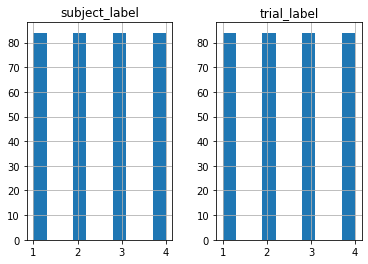

In [12]:
df.hist()

In [13]:
PATH = "/media/tris/tris_files/EEG_datasets/physionet.org/processed"

In [14]:
df_raw = pd.read_csv('/media/tris/tris_files/EEG_datasets/physionet.org/processed/OMA_EEGmmi_window_head.csv')
df_raw

,Subject,Trial,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,...,fn6,fn7,fn8,fn9,fn10,fn11,fn12,fn13,fn14,fn15
0,1,3,-0.128208,-0.114405,-0.064654,-0.019041,-0.015079,-0.028027,-0.033961,-0.042645,...,-0.056254,0.063772,0.166497,0.139531,-0.211290,-0.067726,-0.011513,-0.154349,0.036021,14.357221
1,1,3,0.008675,0.033467,0.023795,0.006855,0.020269,0.004430,-0.072848,0.049739,...,-0.123889,-0.034000,0.053397,0.047623,-0.193499,-0.110367,-0.041746,-0.110361,0.021409,14.139050
2,1,3,0.139821,0.007705,-0.016588,0.027062,0.000482,0.014150,0.114920,0.010105,...,-0.057844,-0.094992,-0.176450,-0.241029,0.032525,-0.051629,-0.082290,-0.030828,0.025562,17.393272
3,1,3,0.185922,0.109436,0.082568,0.074603,0.054954,-0.028222,-0.073561,0.071095,...,-0.231286,-0.402334,-0.315724,-0.280635,-0.322398,-0.425754,-0.436947,-0.406840,0.039294,14.576334
4,1,3,-0.195160,-0.107494,-0.069988,-0.013201,0.017748,-0.033805,-0.161361,-0.150809,...,-0.120887,-0.104634,-0.167317,-0.232173,-0.026849,-0.027082,-0.086220,0.078810,0.019077,16.095714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,4,14,0.008145,-0.011842,0.001821,-0.048860,-0.048690,-0.022765,-0.021141,-0.014985,...,-0.078926,-0.063683,-0.018445,-0.024373,-0.089924,-0.065303,-0.038739,-0.056452,0.039457,17.728049
332,4,14,0.006310,0.003342,-0.005066,-0.002769,-0.001913,-0.003855,-0.004524,-0.002348,...,0.008714,0.013251,-0.001783,-0.005070,0.009787,0.008077,0.000959,0.004628,0.012863,15.062345
333,4,14,-0.014341,-0.000226,0.010915,-0.000619,-0.000405,-0.015864,-0.015929,0.005336,...,-0.015093,-0.011260,-0.002616,-0.002032,-0.015215,-0.007486,-0.006553,-0.007662,0.010424,20.363807
334,4,14,0.010706,0.009324,0.015789,0.011500,0.011425,0.007026,0.007437,0.013707,...,-0.010251,-0.009619,-0.005388,-0.008197,-0.011251,-0.009440,-0.008620,-0.003944,0.037302,19.047586


In [27]:
task = df['trial_label']
df_learn = df_raw.join(task)
#df_learn=df_raw.drop(columns=['Trial'])
df_learn.head()

,Subject,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,Real_Comp9_Mode1,...,fn7,fn8,fn9,fn10,fn11,fn12,fn13,fn14,fn15,trial_label
0,1,-0.128208,-0.114405,-0.064654,-0.019041,-0.015079,-0.028027,-0.033961,-0.042645,-0.000673,...,0.063772,0.166497,0.139531,-0.211290,-0.067726,-0.011513,-0.154349,0.036021,14.357221,1
1,1,0.008675,0.033467,0.023795,0.006855,0.020269,0.004430,-0.072848,0.049739,0.056160,...,-0.034000,0.053397,0.047623,-0.193499,-0.110367,-0.041746,-0.110361,0.021409,14.139050,1
2,1,0.139821,0.007705,-0.016588,0.027062,0.000482,0.014150,0.114920,0.010105,-0.112492,...,-0.094992,-0.176450,-0.241029,0.032525,-0.051629,-0.082290,-0.030828,0.025562,17.393272,1
3,1,0.185922,0.109436,0.082568,0.074603,0.054954,-0.028222,-0.073561,0.071095,-0.002494,...,-0.402334,-0.315724,-0.280635,-0.322398,-0.425754,-0.436947,-0.406840,0.039294,14.576334,1
4,1,-0.195160,-0.107494,-0.069988,-0.013201,0.017748,-0.033805,-0.161361,-0.150809,-0.046385,...,-0.104634,-0.167317,-0.232173,-0.026849,-0.027082,-0.086220,0.078810,0.019077,16.095714,1


In [28]:
df_learn.iloc[[40],:]

,Subject,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,Real_Comp9_Mode1,...,fn7,fn8,fn9,fn10,fn11,fn12,fn13,fn14,fn15,trial_label
40,1,0.008614,0.084111,0.121569,0.14041,0.144386,0.054462,-0.047245,-0.098543,0.026887,...,0.036504,-0.243321,-0.427953,0.063454,-0.103907,-0.314117,-0.165161,0.04703,13.714497,2


In [29]:
os.makedirs('tmp', exist_ok=True)
df_learn.to_feather('tmp/eeg-raw')

In [30]:
import pandas as pd
df_raw = pd.read_feather('tmp/eeg-raw') #lol raw sashimis and sushis
df_raw.head()

,Subject,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,Real_Comp9_Mode1,...,fn7,fn8,fn9,fn10,fn11,fn12,fn13,fn14,fn15,trial_label
0,1,-0.128208,-0.114405,-0.064654,-0.019041,-0.015079,-0.028027,-0.033961,-0.042645,-0.000673,...,0.063772,0.166497,0.139531,-0.211290,-0.067726,-0.011513,-0.154349,0.036021,14.357221,1
1,1,0.008675,0.033467,0.023795,0.006855,0.020269,0.004430,-0.072848,0.049739,0.056160,...,-0.034000,0.053397,0.047623,-0.193499,-0.110367,-0.041746,-0.110361,0.021409,14.139050,1
2,1,0.139821,0.007705,-0.016588,0.027062,0.000482,0.014150,0.114920,0.010105,-0.112492,...,-0.094992,-0.176450,-0.241029,0.032525,-0.051629,-0.082290,-0.030828,0.025562,17.393272,1
3,1,0.185922,0.109436,0.082568,0.074603,0.054954,-0.028222,-0.073561,0.071095,-0.002494,...,-0.402334,-0.315724,-0.280635,-0.322398,-0.425754,-0.436947,-0.406840,0.039294,14.576334,1
4,1,-0.195160,-0.107494,-0.069988,-0.013201,0.017748,-0.033805,-0.161361,-0.150809,-0.046385,...,-0.104634,-0.167317,-0.232173,-0.026849,-0.027082,-0.086220,0.078810,0.019077,16.095714,1


In [31]:
df_raw.iloc[[100],[300]]

,Real_Comp44_Mode5
100,-0.055383


Text(0.5, 1.0, 'zeta6')

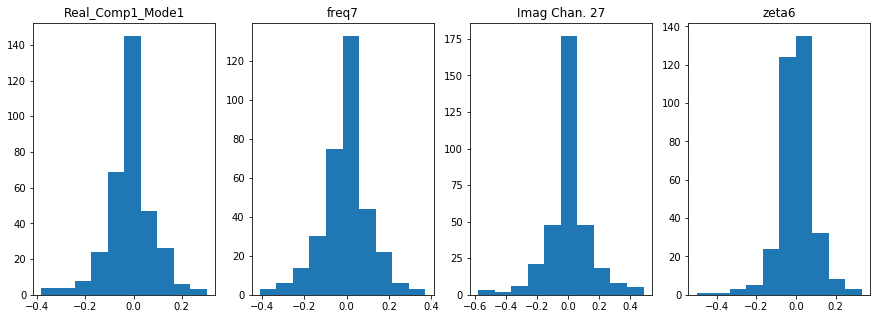

In [32]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].hist(df_raw.Real_Comp1_Mode1)
axs[0].set_title('Real_Comp1_Mode1')
axs[1].hist(df_raw.fn7)
axs[1].set_title('freq7')
axs[2].hist(df_raw.Imag_Comp1_Mode3)
axs[2].set_title('Imag Chan. 27')
axs[3].hist(df_raw.zeta6)
axs[3].set_title('zeta6')

In [33]:
# df1_raw = df_raw[(df_raw['Subject'] == 2)]
# df1_raw.head()

In [34]:
# emotion_quad1 = emotion_quad[(df['subject_label'] == 2)]
# emotion_quad1.head()

In [35]:
valid_idx=np.random.randint(low=0, high=len(df_raw), size=390)

In [36]:
dep_var= 'trial_label'

In [37]:
data = TabularDataBunch.from_df(path, df_raw, dep_var, valid_idx=valid_idx)

In [38]:
data.show_batch()

In [39]:
learn = tabular_learner(data, layers=[100,10], ps=[0.001,0.01], emb_drop=0.04, metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


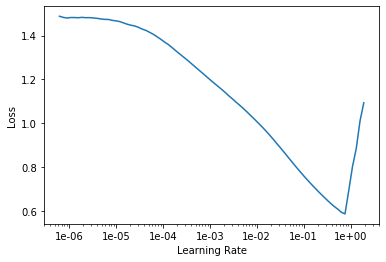

In [40]:
learn.lr_find()
learn.recorder.plot()

In [44]:
learn.fit_one_cycle(5, 1e-2, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.509060,1.496283,0.261538,00:00
1,0.522473,1.518727,0.223077,00:00
2,0.508073,1.545945,0.233333,00:00
3,0.498361,1.565078,0.235897,00:00
4,0.482691,1.572181,0.243590,00:00


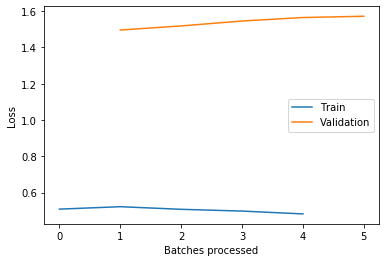

In [45]:
learn.recorder.plot_losses()

In [47]:
df_learn2=df_raw.drop(columns=['trial_label'])
df_learn2


,Subject,Real_Comp1_Mode1,Real_Comp2_Mode1,Real_Comp3_Mode1,Real_Comp4_Mode1,Real_Comp5_Mode1,Real_Comp6_Mode1,Real_Comp7_Mode1,Real_Comp8_Mode1,Real_Comp9_Mode1,...,fn6,fn7,fn8,fn9,fn10,fn11,fn12,fn13,fn14,fn15
0,1,-0.128208,-0.114405,-0.064654,-0.019041,-0.015079,-0.028027,-0.033961,-0.042645,-0.000673,...,-0.056254,0.063772,0.166497,0.139531,-0.211290,-0.067726,-0.011513,-0.154349,0.036021,14.357221
1,1,0.008675,0.033467,0.023795,0.006855,0.020269,0.004430,-0.072848,0.049739,0.056160,...,-0.123889,-0.034000,0.053397,0.047623,-0.193499,-0.110367,-0.041746,-0.110361,0.021409,14.139050
2,1,0.139821,0.007705,-0.016588,0.027062,0.000482,0.014150,0.114920,0.010105,-0.112492,...,-0.057844,-0.094992,-0.176450,-0.241029,0.032525,-0.051629,-0.082290,-0.030828,0.025562,17.393272
3,1,0.185922,0.109436,0.082568,0.074603,0.054954,-0.028222,-0.073561,0.071095,-0.002494,...,-0.231286,-0.402334,-0.315724,-0.280635,-0.322398,-0.425754,-0.436947,-0.406840,0.039294,14.576334
4,1,-0.195160,-0.107494,-0.069988,-0.013201,0.017748,-0.033805,-0.161361,-0.150809,-0.046385,...,-0.120887,-0.104634,-0.167317,-0.232173,-0.026849,-0.027082,-0.086220,0.078810,0.019077,16.095714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,4,0.008145,-0.011842,0.001821,-0.048860,-0.048690,-0.022765,-0.021141,-0.014985,-0.018015,...,-0.078926,-0.063683,-0.018445,-0.024373,-0.089924,-0.065303,-0.038739,-0.056452,0.039457,17.728049
332,4,0.006310,0.003342,-0.005066,-0.002769,-0.001913,-0.003855,-0.004524,-0.002348,-0.004090,...,0.008714,0.013251,-0.001783,-0.005070,0.009787,0.008077,0.000959,0.004628,0.012863,15.062345
333,4,-0.014341,-0.000226,0.010915,-0.000619,-0.000405,-0.015864,-0.015929,0.005336,0.005036,...,-0.015093,-0.011260,-0.002616,-0.002032,-0.015215,-0.007486,-0.006553,-0.007662,0.010424,20.363807
334,4,0.010706,0.009324,0.015789,0.011500,0.011425,0.007026,0.007437,0.013707,0.014556,...,-0.010251,-0.009619,-0.005388,-0.008197,-0.011251,-0.009440,-0.008620,-0.003944,0.037302,19.047586


In [48]:
X_train, X_test, y_train, y_test = train_test_split(
    df_learn2, task, test_size=0.2, shuffle=True)

In [49]:
classifier = AdaBoostClassifier(n_estimators=40)

In [50]:
classifier.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=40)

In [51]:
predicted = classifier.predict(X_test)

Classification report for classifier AdaBoostClassifier(n_estimators=40):
              precision    recall  f1-score   support

           1       0.08      0.07      0.08        14
           2       0.21      0.17      0.19        18
           3       0.50      0.16      0.24        25
           4       0.12      0.36      0.18        11

    accuracy                           0.18        68
   macro avg       0.23      0.19      0.17        68
weighted avg       0.28      0.18      0.18        68


Confusion matrix:
[[ 1  4  2  7]
 [ 4  3  2  9]
 [ 2  5  4 14]
 [ 5  2  0  4]]


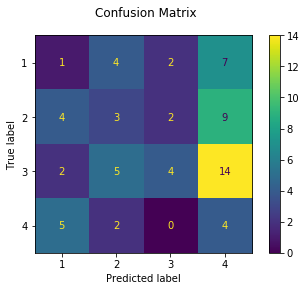

In [52]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [53]:
classifier = svm.SVC(gamma=0.2, kernel='poly', degree=3)

In [54]:
classifier.fit(X_train, y_train)

SVC(gamma=0.2, kernel='poly')

In [55]:
predicted = classifier.predict(X_test)

Classification report for classifier SVC(gamma=0.2, kernel='poly'):
              precision    recall  f1-score   support

           1       0.24      0.29      0.26        14
           2       0.33      0.33      0.33        18
           3       0.30      0.24      0.27        25
           4       0.00      0.00      0.00        11

    accuracy                           0.24        68
   macro avg       0.22      0.21      0.21        68
weighted avg       0.25      0.24      0.24        68


Confusion matrix:
[[4 3 4 3]
 [4 6 6 2]
 [5 6 6 8]
 [4 3 4 0]]


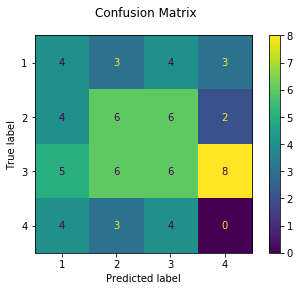

In [56]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [57]:
classifier = tree.DecisionTreeClassifier()

In [58]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
predicted = classifier.predict(X_test)

Classification report for classifier DecisionTreeClassifier():
              precision    recall  f1-score   support

           1       0.22      0.29      0.25        14
           2       0.39      0.50      0.44        18
           3       0.44      0.16      0.24        25
           4       0.28      0.45      0.34        11

    accuracy                           0.32        68
   macro avg       0.33      0.35      0.32        68
weighted avg       0.36      0.32      0.31        68


Confusion matrix:
[[4 3 2 5]
 [3 9 2 4]
 [9 8 4 4]
 [2 3 1 5]]


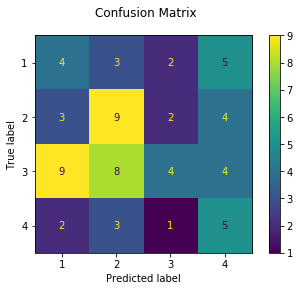

In [60]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [ ]:
tree.plot_tree(classifier) 

[Text(198.15975000000003, 208.38, 'X[318] <= 0.028\ngini = 0.748\nsamples = 268\nvalue = [70, 66, 59, 73]'),
 Text(142.29000000000002, 190.26, 'X[582] <= 0.069\ngini = 0.74\nsamples = 161\nvalue = [47, 46, 41, 27]'),
 Text(95.97600000000001, 172.14, 'X[1131] <= 0.072\ngini = 0.738\nsamples = 116\nvalue = [23, 30, 39, 24]'),
 Text(66.96000000000001, 154.01999999999998, 'X[665] <= 0.026\ngini = 0.717\nsamples = 93\nvalue = [20, 14, 37, 22]'),
 Text(40.176, 135.89999999999998, 'X[1185] <= 0.005\ngini = 0.739\nsamples = 60\nvalue = [18, 11, 13, 18]'),
 Text(17.856, 117.77999999999999, 'X[1102] <= -0.047\ngini = 0.67\nsamples = 33\nvalue = [2, 7, 9, 15]'),
 Text(13.392000000000001, 99.66, 'gini = 0.0\nsamples = 6\nvalue = [0, 0, 6, 0]'),
 Text(22.32, 99.66, 'X[681] <= 0.034\ngini = 0.606\nsamples = 27\nvalue = [2, 7, 3, 15]'),
 Text(13.392000000000001, 81.53999999999999, 'X[2] <= -0.006\ngini = 0.41\nsamples = 20\nvalue = [1, 1, 3, 15]'),
 Text(8.928, 63.41999999999999, 'X[1740] <= 0.009\ng

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(classifier)
plt.show()

In [ ]:
classifier = RandomForestClassifier(n_estimators=3)

In [148]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [149]:
predicted = classifier.predict(X_test)

Classification report for classifier RandomForestClassifier(n_estimators=3):
              precision    recall  f1-score   support

           1       0.18      0.29      0.22        17
           2       0.11      0.18      0.14        11
           3       0.19      0.19      0.19        16
           4       0.17      0.04      0.07        24

    accuracy                           0.16        68
   macro avg       0.16      0.18      0.15        68
weighted avg       0.17      0.16      0.15        68


Confusion matrix:
[[5 6 4 2]
 [5 2 3 1]
 [9 2 3 2]
 [9 8 6 1]]


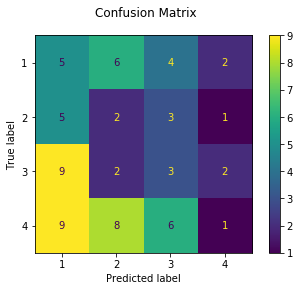

In [150]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(
    df1_raw, emotion_quad1, test_size=0.2, shuffle=True)

NameError: name 'df1_raw' is not defined

In [152]:
classifier = RandomForestClassifier(n_estimators=3)

In [70]:
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=3)

In [71]:
predicted = classifier.predict(X_test)

Classification report for classifier RandomForestClassifier(n_estimators=3):
              precision    recall  f1-score   support

         0.0       0.40      0.67      0.50         3
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2

    accuracy                           0.25         8
   macro avg       0.10      0.17      0.12         8
weighted avg       0.15      0.25      0.19         8


Confusion matrix:
[[2 0 1 0]
 [1 0 1 0]
 [0 0 0 1]
 [2 0 0 0]]


/media/tris/tris_files/anaconda3/envs/fastai/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


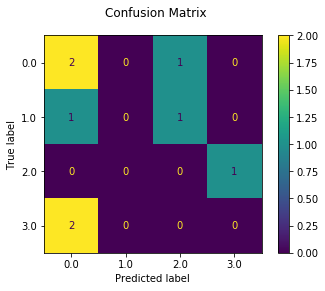

In [72]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)